# TRUNK タイタニック号事件の生存者を予測してみよう

## 1.基本操作の確認

In [ ]:
print("Hello world")

Hello world


In [ ]:
# 実行結果が　100　になるように変数に代入してみる
int_a = 23
int_b = 77
print('合計:', int_a + int_b)

合計: 100


## 2.MEMO


ご自由にお使いください

In [ ]:
# コメントアウト

## 3.データの準備と確認

### 3-1ファイルの配置


共有される画面の案内に従ってファイルを配置してください


必要：titanic.zip

### 3-2ファイルの内容確認


### 3-3「Pandas」のインポート

In [ ]:
# pd という名前で pandas をインポート
import pandas as pd 

### 3-4 データ確認

In [ ]:
# test.csv読み込み　変数に格納
test_csv = pd.read_csv('/content/test.csv')

In [ ]:
# train.csv読み込み　変数に格納
train_csv = pd.read_csv('/content/train.csv')

In [ ]:
#gender.csv読み込み　変数に格納
gender_submission_csv = pd.read_csv('/content/gender_submission.csv')

In [ ]:
test_csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
gender_submission_csv

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 4.生存者を予測するモデルを作る

### 4-1 データを眺めてみる 「pyplot」


In [ ]:
#　pyplot をインポート
import matplotlib.pyplot as plt
%matplotlib inline 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f826715e3d0>,
      dtype=object)

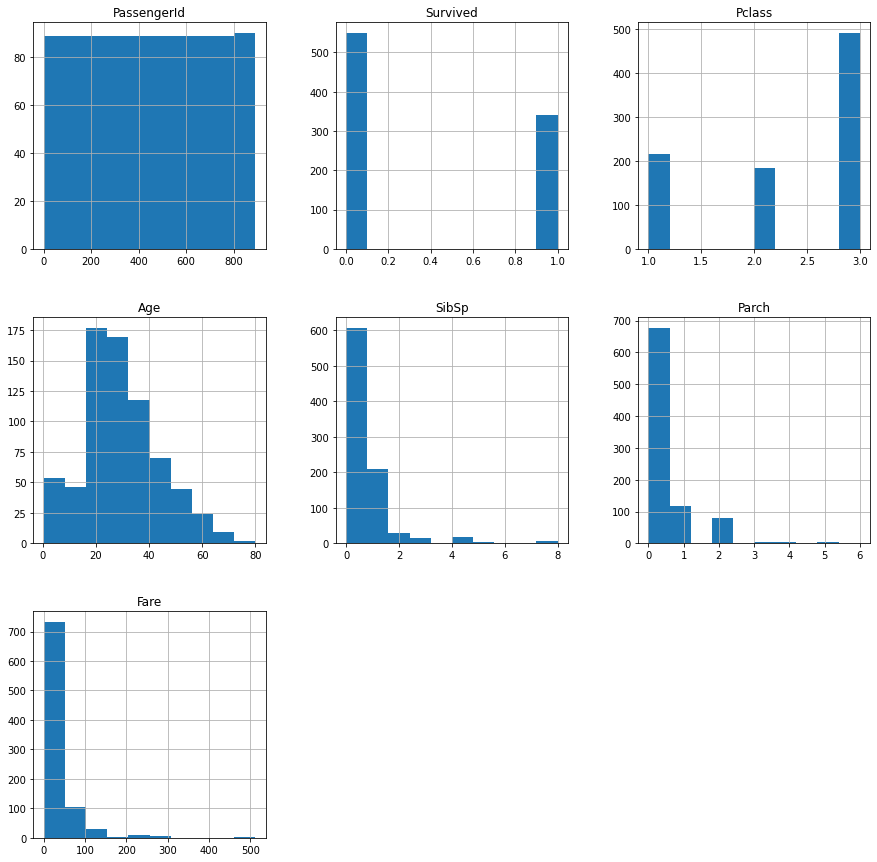

In [ ]:
# ヒストグラフで出力
train_csv.hist(figsize = (15,15))

### 4-2 欠損値を補完する

In [ ]:
#欠損値確認
train_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 年齢[Age]の欠損箇所に中央値を補完
train_csv['Age'] = train_csv['Age'].fillna(train_csv['Age'].median())

### 4-3 文字列を特徴量に変換する

In [ ]:
# 搭乗地を数値に変換
train_csv.Embarked = train_csv.Embarked.replace(['C', 'S', 'Q'], [0.0, 1.0, 2.0])

In [ ]:
# 性別を数値に変換
train_csv.Sex = train_csv.Sex.replace(['male', 'female'], [0.0, 1.0])

### 4-4 モデルを作って予測する

In [ ]:
test_csv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#ライブラリインポート
from sklearn.tree import DecisionTreeClassifier

#説明変数と目的変数に分ける(学習データと答え)
X = train_csv[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']].values
Y = train_csv['Survived'].values

#モデルの生成
model = DecisionTreeClassifier(max_depth=100)

#学習
model_1 = model.fit(X, Y)

model_1.score(X, Y)

predicted = model_1.predict()

ValueError: ignored